In [29]:
import argparse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [66]:
df_whole = pd.read_csv("/home/gean/Code/nns_performance_prediction/results/fast/test1/Subset108_N172_K5000_nasbench_best_archs.csv")
df_whole

,Seed,Model,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc
0,0,LinearRegression,1,8.455731e+12,0.927584,0.923745
1,0,LinearRegression,2,8.455731e+12,0.938802,0.933060
2,0,LinearRegression,3,8.455731e+12,0.911358,0.905482
3,0,LinearRegression,4,8.455731e+12,0.922943,0.918102
4,0,LinearRegression,5,8.455731e+12,0.934028,0.927851
...,...,...,...,...,...,...
599995,12345,DummyRegressor,4996,9.100230e-01,0.879941,0.877738
599996,12345,DummyRegressor,4997,9.100230e-01,0.874833,0.871227
599997,12345,DummyRegressor,4998,9.100230e-01,0.902644,0.898037
599998,12345,DummyRegressor,4999,9.100230e-01,0.860744,0.854167


In [81]:
df_one_model = df_whole.loc[df_whole['Model'] == 'DummyRegressor'].copy()
# df_lr = df_whole
df_one_model

,Seed,Model,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc
55000,0,DummyRegressor,1,0.893705,0.921575,0.913462
55001,0,DummyRegressor,2,0.893705,0.920606,0.914330
55002,0,DummyRegressor,3,0.893705,0.612914,0.611579
55003,0,DummyRegressor,4,0.893705,0.916667,0.912226
55004,0,DummyRegressor,5,0.893705,0.896868,0.887620
...,...,...,...,...,...,...
599995,12345,DummyRegressor,4996,0.910023,0.879941,0.877738
599996,12345,DummyRegressor,4997,0.910023,0.874833,0.871227
599997,12345,DummyRegressor,4998,0.910023,0.902644,0.898037
599998,12345,DummyRegressor,4999,0.910023,0.860744,0.854167


In [82]:
df_one_model.insert(0, 'Index', list(range(1, len(df_one_model) + 1)))
df_one_model

,Index,Seed,Model,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc
55000,1,0,DummyRegressor,1,0.893705,0.921575,0.913462
55001,2,0,DummyRegressor,2,0.893705,0.920606,0.914330
55002,3,0,DummyRegressor,3,0.893705,0.612914,0.611579
55003,4,0,DummyRegressor,4,0.893705,0.916667,0.912226
55004,5,0,DummyRegressor,5,0.893705,0.896868,0.887620
...,...,...,...,...,...,...,...
599995,49996,12345,DummyRegressor,4996,0.910023,0.879941,0.877738
599996,49997,12345,DummyRegressor,4997,0.910023,0.874833,0.871227
599997,49998,12345,DummyRegressor,4998,0.910023,0.902644,0.898037
599998,49999,12345,DummyRegressor,4999,0.910023,0.860744,0.854167


In [83]:
df_one_model = df_one_model.sort_values(by=['Pred_Val_Acc'], ascending=False)
df_one_model

,Index,Seed,Model,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc
355000,25001,123,DummyRegressor,1,0.918136,0.877170,0.875668
356669,26670,123,DummyRegressor,1670,0.918136,0.859642,0.850127
356662,26663,123,DummyRegressor,1663,0.918136,0.909455,0.905983
356663,26664,123,DummyRegressor,1664,0.918136,0.918637,0.914196
356664,26665,123,DummyRegressor,1665,0.918136,0.858607,0.850093
...,...,...,...,...,...,...,...
58334,3335,0,DummyRegressor,3335,0.893705,0.900073,0.895533
58335,3336,0,DummyRegressor,3336,0.893705,0.923711,0.917201
58336,3337,0,DummyRegressor,3337,0.893705,0.907085,0.900808
58337,3338,0,DummyRegressor,3338,0.893705,0.906217,0.898905


In [84]:
df_one_model['Pred_Rank'] = list(range(1, len(df_one_model) + 1))
df_one_model

,Index,Seed,Model,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc,Pred_Rank
355000,25001,123,DummyRegressor,1,0.918136,0.877170,0.875668,1
356669,26670,123,DummyRegressor,1670,0.918136,0.859642,0.850127,2
356662,26663,123,DummyRegressor,1663,0.918136,0.909455,0.905983,3
356663,26664,123,DummyRegressor,1664,0.918136,0.918637,0.914196,4
356664,26665,123,DummyRegressor,1665,0.918136,0.858607,0.850093,5
...,...,...,...,...,...,...,...,...
58334,3335,0,DummyRegressor,3335,0.893705,0.900073,0.895533,49996
58335,3336,0,DummyRegressor,3336,0.893705,0.923711,0.917201,49997
58336,3337,0,DummyRegressor,3337,0.893705,0.907085,0.900808,49998
58337,3338,0,DummyRegressor,3338,0.893705,0.906217,0.898905,49999


In [85]:
df_one_model = df_one_model.sort_values(by=['True_Val_Acc'], ascending=False)
df_one_model

,Index,Seed,Model,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc,Pred_Rank
355297,25298,123,DummyRegressor,298,0.918136,0.945913,0.939804,1764
58324,3325,0,DummyRegressor,3325,0.893705,0.945880,0.940104,49986
596726,46727,12345,DummyRegressor,1727,0.910023,0.945747,0.937667,29739
239290,19291,42,DummyRegressor,4291,0.910874,0.945680,0.939837,17217
237674,17675,42,DummyRegressor,2675,0.910874,0.945580,0.939470,15685
...,...,...,...,...,...,...,...,...
418896,33897,666,DummyRegressor,3897,0.908737,0.095019,0.100060,32143
176913,11914,10,DummyRegressor,1914,0.911108,0.095019,0.100060,13920
535942,40943,1234,DummyRegressor,943,0.902731,0.095019,0.100093,36979
357436,27437,123,DummyRegressor,2437,0.918136,0.094985,0.100027,817


In [86]:
df_one_model['True_Rank'] = list(range(1, len(df_one_model) + 1))
df_one_model

,Index,Seed,Model,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc,Pred_Rank,True_Rank
355297,25298,123,DummyRegressor,298,0.918136,0.945913,0.939804,1764,1
58324,3325,0,DummyRegressor,3325,0.893705,0.945880,0.940104,49986,2
596726,46727,12345,DummyRegressor,1727,0.910023,0.945747,0.937667,29739,3
239290,19291,42,DummyRegressor,4291,0.910874,0.945680,0.939837,17217,4
237674,17675,42,DummyRegressor,2675,0.910874,0.945580,0.939470,15685,5
...,...,...,...,...,...,...,...,...,...
418896,33897,666,DummyRegressor,3897,0.908737,0.095019,0.100060,32143,49996
176913,11914,10,DummyRegressor,1914,0.911108,0.095019,0.100060,13920,49997
535942,40943,1234,DummyRegressor,943,0.902731,0.095019,0.100093,36979,49998
357436,27437,123,DummyRegressor,2437,0.918136,0.094985,0.100027,817,49999


In [87]:
tau, p_value = stats.kendalltau(list(df_one_model['Pred_Rank']), list(df_one_model['True_Rank']))
print("tau: {}, p_value: {}".format(tau, p_value))

tau: 0.005127640152803057, p_value: 0.08546833010262837


In [88]:
corr = df_one_model.corr(method='kendall')
corr

,Index,Seed,K,Pred_Val_Acc,True_Val_Acc,True_Test_Acc,Pred_Rank,True_Rank
Index,1.000000,0.948693,0.099991,0.105410,-0.000161,-0.000516,-0.106686,0.000160
Seed,0.948693,1.000000,0.000000,0.111111,0.000129,-0.000231,-0.105410,-0.000130
K,0.099991,0.000000,1.000000,0.000000,-0.002864,-0.003003,-0.006685,0.002862
Pred_Val_Acc,0.105410,0.111111,0.000000,1.000000,0.005464,0.005580,-0.948693,-0.005461
True_Val_Acc,-0.000161,0.000129,-0.002864,0.005464,1.000000,0.941566,-0.005130,-0.999763
True_Test_Acc,-0.000516,-0.000231,-0.003003,0.005580,0.941566,1.000000,-0.005230,-0.941344
Pred_Rank,-0.106686,-0.105410,-0.006685,-0.948693,-0.005130,-0.005230,1.000000,0.005128
True_Rank,0.000160,-0.000130,0.002862,-0.005461,-0.999763,-0.941344,0.005128,1.000000


<AxesSubplot:>

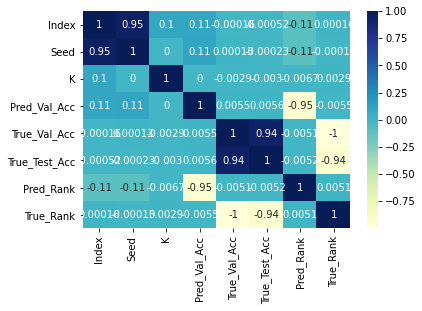

In [89]:
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

In [63]:
corr = df_lr.corr(method='spearman')
corr

,K,Pred_Val_Acc,Seed,True_Test_Acc,True_Val_Acc
K,1.000000,-0.630528,0.000000,-0.169612,-0.188898
Pred_Val_Acc,-0.630528,1.000000,0.074528,0.177985,0.190730
Seed,0.000000,0.074528,1.000000,-0.026382,-0.023955
True_Test_Acc,-0.169612,0.177985,-0.026382,1.000000,0.896449
True_Val_Acc,-0.188898,0.190730,-0.023955,0.896449,1.000000


<AxesSubplot:>

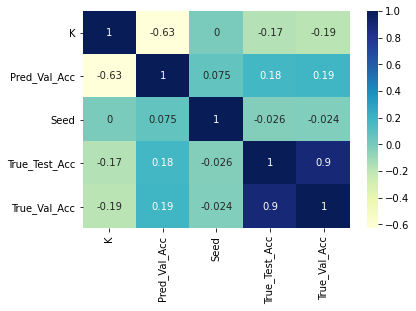

In [64]:
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

In [65]:
df_one_model.head(40)

,Index,K,Model,Pred_Val_Acc,Seed,True_Test_Acc,True_Val_Acc,Pred_Rank,True_Rank
461488,36489,1489,RandomForestRegressor,0.937984,1000,0.942341,0.950554,7908,1
40145,146,146,RandomForestRegressor,0.939537,0,0.942341,0.950554,1598,2
162996,12997,2997,RandomForestRegressor,0.937524,10,0.940872,0.948952,12664,3
463114,38115,3115,RandomForestRegressor,0.936308,1000,0.940872,0.948952,24954,4
400632,30633,633,RandomForestRegressor,0.939483,666,0.940872,0.948952,1626,5
282340,22341,2341,RandomForestRegressor,0.935885,100,0.940872,0.948952,32418,6
282341,22342,2342,RandomForestRegressor,0.935885,100,0.941006,0.948150,32419,7
400635,30636,636,RandomForestRegressor,0.939483,666,0.941006,0.948150,1624,8
162983,12984,2984,RandomForestRegressor,0.937524,10,0.941006,0.948150,12653,9
463158,38159,3159,RandomForestRegressor,0.936308,1000,0.941006,0.948150,24830,10
